# Examples for pyPlumbing

PyPlumbing is the new package which substitutes pySeifert. PyPlumbing offers numerous advantages with respect to pySeifert:
1. pyPlumbing is quicker than pySeifert
2. pyPlumbing is able to handle any weakly negative plumbing manifold

This note covers a few examples of pyPlumbing usage

In [1]:
from pyPlumbing import *
import itertools
import time

## Definitions
The Plumbing class is the main object that is used in pyPlumbing. It represents a Plumbing manifold. Its methods and attributes are topological invariants or other useful information and actions on the manifold.
Plumbings can be defined in multiple ways depending on the manifold. The most generic is to define a Plumbing through a plumbing graph.A graph is defined by a dictionary, with vertex labels ranging from 0 to the number of nodes minus one, and a List of Tuples identifying the edges of the graph.

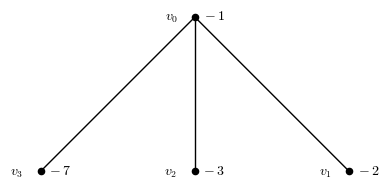

In [2]:
# This is an example of the defintion of a plumbing. The plumbing contains 4 vertices and 3 edges. 
# The weights of the vertices are given by the dictionary {0: -1, 1: -2, 2: -3, 3: -7}. 
# The edges are given by the list [(0, 1), (0, 2), (0, 3)].
# The plumbing is displayed using the display() function.
P = Plumbing({0: -1, 1: -2, 2: -3, 3: -7}, [(0, 1), (0, 2), (0, 3)]);P.display()

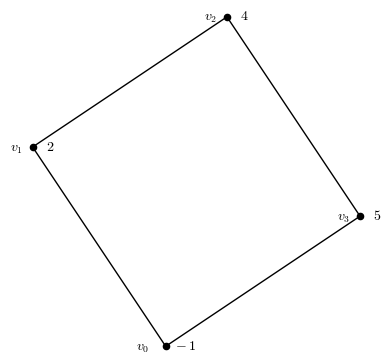

32

In [8]:
P = Plumbing({0: -1, 1: 2, 2: 4, 3: 5}, [(0,1),(1,2),(2,3),(3,0)]); P.display()
spin_c = P.trivial_spin_c(["A",1])
P.zhat_unbounded(["A",1],spin_c,4)

In [16]:
load("../src/pyPlumbing/plumbing.sage")
P = Plumbing({0: -1, 1: 2, 2: 4, 3: 5, 4: 5}, [(0,1),(1,2),(2,3),(3,4),(4,0)]); P.display()
spin_c = P.trivial_spin_c(["A",1])
P.zhat_unbounded(["A",1],spin_c,4)

ImportError: attempted relative import with no known parent package

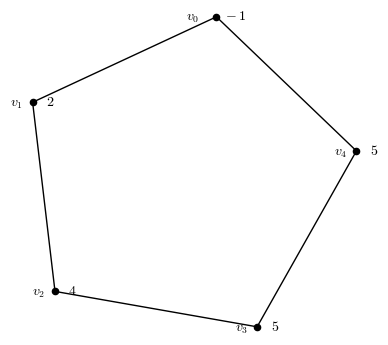

64

In [6]:
P = Plumbing({0: -1, 1: 2, 2: 4, 3: 5, 4: 5}, [(0,1),(1,2),(2,3),(3,4),(4,0)]); P.display()
spin_c = P.trivial_spin_c(["A",1])
P.zhat_unbounded(["A",1],spin_c,4)

Plumbings can be defined with any orientation. Consider the following plumbing.

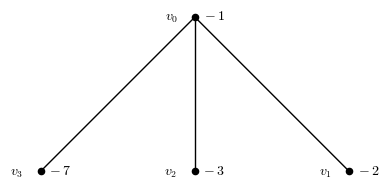

In [ ]:
P = Plumbing({0: -1, 1: -2, 2: -3, 3: -7}, [(0, 1), (0, 2), (0, 3)]);P.display()

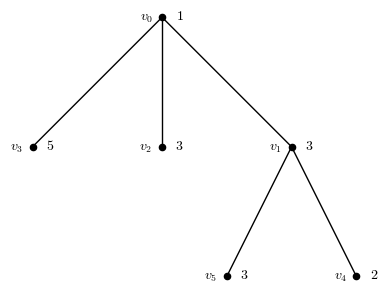

In [31]:
P3 = Plumbing({0: 1, 1:3, 2:3, 3:5, 4:2, 5:3}, [(0,1),(0,2),(0,3),(1,4),(1,5)]); P3.display()

pyPlumbing can tell us of its weak definiteness, which is one condition necessary to compute the Ẑ invariant.

In [5]:
P3.weak_definiteness_type

'positive weakly definite'

Since the manifold is weakly positive definite, we may wish to invert its orientation so we may compute the Ẑ invariant. PyPlumbing can do this.

negative weakly definite


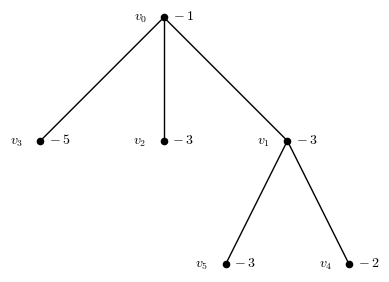

In [6]:
P3 = P3.invert_orientation();
print(P3.weak_definiteness_type)
P3.display();

Seifert manifolds may also be defined through their Seifert data

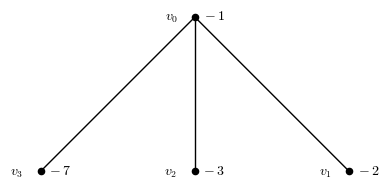

In [7]:
P = Plumbing.from_Seifert_data([-1,1/2,1/3,1/7]);P.display()

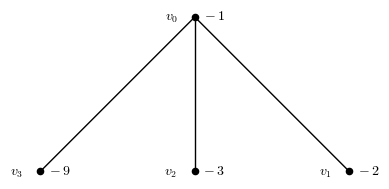

In [8]:
P4 = Plumbing.from_Seifert_data([-1,1/2,1/3,1/9]);P4.display()

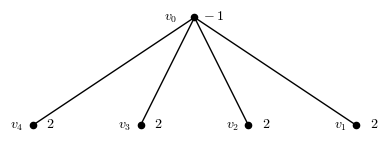

In [9]:
P5 = Plumbing.from_Seifert_data([-1,-1/2,-1/2,-1/2,-1/2]);P5.display()

Spin c structures representatives can be computed for a given ADE group

In [10]:
P.spin_c(["A",1]),P.spin_c(["A",2]),P.spin_c(["A",5]),P.spin_c(["D",5])

([
[ 1]
[-1]
[-1]
[-1]
],
 [
[ 1  1]
[-1 -1]
[-1 -1]
[-1 -1]
],
 [
[ 1  1  1  1  1]
[-1 -1 -1 -1 -1]
[-1 -1 -1 -1 -1]
[-1 -1 -1 -1 -1]
],
 [
[ 1  1  1  1  1]
[-1 -1 -1 -1 -1]
[-1 -1 -1 -1 -1]
[-1 -1 -1 -1 -1]
])

In [11]:
P4.spin_c(["A",1]),P4.spin_c(["A",2]),P4.spin_c(["A",5]),P4.spin_c(["D",5])

([
[ 1]  [ 3]
[-1]  [-1]
[-1]  [-5]
[-1], [-7]
],
 [
[ 1  1]  [ 3  0]
[-1 -1]  [-1 -1]
[-1 -1]  [-5  1]
[-1 -1], [-7  2]
],
 [
[ 1  1  1  1  1]  [ 3  0  1  1  1]
[-1 -1 -1 -1 -1]  [-1 -1 -1 -1 -1]
[-1 -1 -1 -1 -1]  [-5  1 -1 -1 -1]
[-1 -1 -1 -1 -1], [-7  2 -1 -1 -1]
],
 [
[ 1  1  1  1  1]  [ 3  0  1  1  1]
[-1 -1 -1 -1 -1]  [-1 -1 -1 -1 -1]
[-1 -1 -1 -1 -1]  [-5  1 -1 -1 -1]
[-1 -1 -1 -1 -1], [-7  2 -1 -1 -1]
])

And with these the $\hat{Z}$ can be computed. There are two functions to compute zhat. Plumbing.zhat and Plumbing.zhat_unbounded. The first ensures convergence of all q-powers outputted, the latter does not (but it's quicker). For each, there is a choice of three methods to compute the invariants which leverage three separate but parallel algorithms using regular python, numpy and cython.

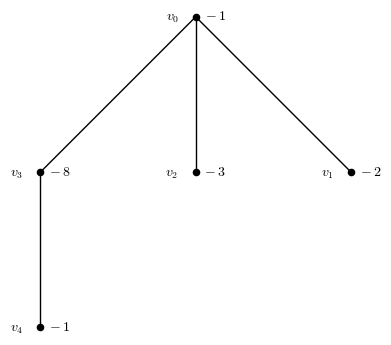

In [12]:
P_equiv = Plumbing({0: -1, 1: -2, 2: -3, 3: -8, 4: -1}, [(0, 1), (0, 2), (0, 3), (3,4)]);P_equiv.display()

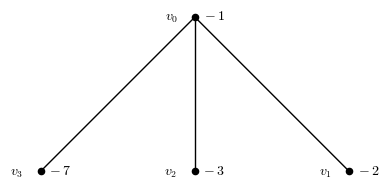

In [13]:
P.display()

In [14]:
st = time.time()
zh = P.zhat(["A",1],P.spin_c(["A",1])[0],10000,n_powers_start = 10, method = "python", info = False) 
end = time.time()
print(end-st)
print(zh)

5.4913365840911865
q^(1/2)(4 - 4q^(1) - 4q^(5) + 4q^(10) - 4q^(11) + 4q^(18) + 4q^(30) - 4q^(41) + 4q^(43) - 4q^(56) + O(q^76))


In [15]:
st = time.time()
zh = P.zhat(["A",1],P.spin_c(["A",1])[0],10000,n_powers_start = 10, method = "vectorized") 
end = time.time()
print(end-st)
print(zh)

4.275954484939575
q^(1/2)(4 - 4q^(1) - 4q^(5) + 4q^(10) - 4q^(11) + 4q^(18) + 4q^(30) - 4q^(41) + 4q^(43) - 4q^(56) + O(q^76))


In [16]:
st = time.time()
zh = P.zhat(["A",1],P.spin_c(["A",1])[0],10000, n_powers_start = 10, method = "cython") 
end = time.time()
print(end-st)
print(zh)

KeyboardInterrupt: 

In [ ]:
st = time.time()
zh = P.zhat(["A",1],P.spin_c(["A",1])[0],1, n_powers_start = 1, method = "cython") 
end = time.time()
print(end-st)
print(zh)

0.03474831581115723
q^(1/2)(4 - 4q^(1) - 4q^(5) + 4q^(10) - 4q^(11) + 4q^(18) + 4q^(30) - 4q^(41) + O(q^42))


In [ ]:
st = time.time()
zh = P.zhat(["A",2],P.spin_c(["A",2])[0],1, n_powers_start = 1, method = "cython") 
end = time.time()
print(end-st)
print(zh)

1.5685465335845947
q^(2)(12 - 24q^(1) + 24q^(3) + 12q^(4) - 24q^(5) - 24q^(8) + 48q^(9) + 24q^(10) - 48q^(11) + 24q^(13) + O(q^14))


It's also possible to compute Ẑ invariants with Wilson lines. This functionality is very new and still needs significant testing.

In [ ]:
for w in range(1,6):
    wilson = [vector([0])]*3 + [vector([w])]
    print(wilson)
    st = time.time()
    zh = P.zhat(["A",1],P.spin_c(["A",1])[0],100,wilson=wilson, n_powers_start = 10, method = "cython") 
    end = time.time()
    print(end-st)
    print(zh) 

[(0), (0), (0), (1)]
0.167708158493042
q^(3/4)(4 - 4q^(2) - 4q^(3) - 4q^(8) + 4q^(13) + 4q^(22) + 4q^(25) + 4q^(37) - 4q^(47) - 4q^(63) + O(q^68))
[(0), (0), (0), (2)]
0.13974332809448242
q^(3/2)(4 - 4q^(1) - 4q^(3) - 4q^(5) + 4q^(16) + 4q^(20) + 4q^(26) + 4q^(31) - 4q^(53) - 4q^(60) + O(q^70))
[(0), (0), (0), (3)]
0.14330220222473145
q^(7/4)(-4 + 4q^(1) - 4q^(3) - 4q^(5) + 4q^(16) + 4q^(20) + 4q^(26) + 4q^(31) - 4q^(53) - 4q^(60) + O(q^70))
[(0), (0), (0), (4)]
0.14192628860473633
q^(3/2)(-4 - 4q^(2) + 4q^(3) - 4q^(8) + 4q^(13) + 4q^(22) + 4q^(25) + 4q^(37) - 4q^(47) - 4q^(63) + O(q^68))
[(0), (0), (0), (5)]
0.137282133102417
q^(7/4)(-4 - 4q^(1) + 4q^(5) + 4q^(10) - 4q^(11) + 4q^(18) + 4q^(30) - 4q^(41) + 4q^(43) - 4q^(56) + O(q^76))


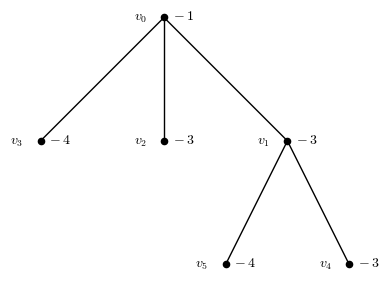

In [ ]:
P2.display()

In [ ]:
# P2 is a non-spherical manifold with 2 high valency vertices
st = time.time()
zh = P2.zhat(["A",1],P2.spin_c(["A",1])[0],100,n_powers_start = 16, method = "python") 
end = time.time()
print(end-st)
print(zh)

30.674920320510864
q^(1/2)(8 + 8q^(1) - 8q^(2) - 8q^(4) - 16q^(5) + 8q^(6) - 8q^(7) - 8q^(8) + 8q^(10) + 8q^(11) + O(q^12))


In [ ]:
st = time.time()
zh = P2.zhat(["A",1],P2.spin_c(["A",1])[0],5,n_powers_start = 1, method = "vectorized") 
end = time.time()
print(end-st)
print(zh)

0.7024414539337158
q^(1/2)(8 + 8q^(1) - 8q^(2) - 8q^(4) - 16q^(5) + 8q^(6) + O(q^7))


In [ ]:
st = time.time()
zh = P2.zhat(["A",1],P2.spin_c(["A",1])[0],100,n_powers_start = 16, method = "cython") 
end = time.time()
print(end-st)
print(zh)

6.655447483062744
q^(1/2)(8 + 8q^(1) - 8q^(2) - 8q^(4) - 16q^(5) + 8q^(6) - 8q^(7) - 8q^(8) + 8q^(10) + 8q^(11) + O(q^12))


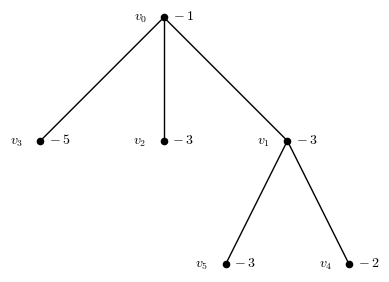

In [ ]:
P3.display()

In [ ]:
# P3 is a non-spherical manifold with 2 high valency vertices
st = time.time()
zh = P3.zhat(["A",1],P3.spin_c(["A",1])[0],100,n_powers_start = 16, method = "python") 
end = time.time()
print(end-st)
print(zh)

32.22810506820679
q^(1/2)(12 + 12q^(1) - 4q^(2) + 8q^(3) + 4q^(4) - 8q^(6) - 16q^(7) + 8q^(8) - 8q^(9) - 8q^(10) + O(q^11))


In [ ]:
st = time.time()
zh = P3.zhat(["A",1],P3.spin_c(["A",1])[0],100,n_powers_start = 16, method = "vectorized") 
end = time.time()
print(end-st)
print(zh)

6.656383991241455
q^(1/2)(12 + 12q^(1) - 4q^(2) + 8q^(3) + 4q^(4) - 8q^(6) - 16q^(7) + 8q^(8) - 8q^(9) - 8q^(10) + O(q^11))


In [ ]:
st = time.time()
zh = P3.zhat(["A",1],P3.spin_c(["A",1])[0],100,n_powers_start = 16, method = "cython") 
end = time.time()
print(end-st)
print(zh)

6.631842851638794
q^(1/2)(12 + 12q^(1) - 4q^(2) + 8q^(3) + 4q^(4) - 8q^(6) - 16q^(7) + 8q^(8) - 8q^(9) - 8q^(10) + O(q^11))


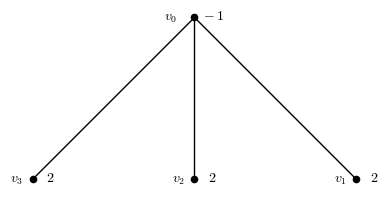

In [ ]:
P5.display()

In [ ]:
st = time.time()
zh = P5.zhat(["A",1],P5.spin_c(["A",1])[0],1000,n_powers_start = 50, method = "python") 
end = time.time()
print(end-st)
print(zh)

2.152961254119873
q^(1/2)(4 - 4q^(5) + 4q^(15) - 4q^(30) + 4q^(50) - 4q^(75) + 4q^(105) - 4q^(140) + 4q^(180) - 4q^(225) + O(q^275))


In [ ]:
st = time.time()
zh = P5.zhat(["A",1],P5.spin_c(["A",1])[0],1000,n_powers_start = 50, method = "vectorized") 
end = time.time()
print(end-st)
print(zh)

2.147099733352661
q^(1/2)(4 - 4q^(5) + 4q^(15) - 4q^(30) + 4q^(50) - 4q^(75) + 4q^(105) - 4q^(140) + 4q^(180) - 4q^(225) + O(q^275))


In [ ]:
for spin_c in P5.spin_c(["A",1]):
    print(spin_c.T)
    st = time.time()
    zh = P5.zhat(["A",1],spin_c,1000,n_powers_start = 50, method = "cython") 
    end = time.time()
    print(end-st)
    print(zh)

[ 1 -1 -1 -1]
1.9700257778167725
q^(1/2)(4 - 4q^(5) + 4q^(15) - 4q^(30) + 4q^(50) - 4q^(75) + 4q^(105) - 4q^(140) + 4q^(180) - 4q^(225) + O(q^275))
[1 1 1 1]
4.2024829387664795
q^(-1/10)(-2 + 2q^(2) - 2q^(3) - 2q^(9) + 2q^(11) + 2q^(21) - 2q^(24) - 2q^(38) + 2q^(42) + 2q^(60) + O(q^65))
[ 3 -1  1  1]
4.91034722328186
q^(1/2)(4 - 4q^(5) + 4q^(15) - 4q^(30) + 4q^(50) - 4q^(75) + 4q^(105) - 4q^(140) + 4q^(180) - 4q^(225) + O(q^275))
[ 3  1 -1  1]
6.435667514801025
q^(1/2)(4 - 4q^(5) + 4q^(15) - 4q^(30) + 4q^(50) - 4q^(75) + 4q^(105) - 4q^(140) + 4q^(180) - 4q^(225) + O(q^275))
[ 3  1  1 -1]
7.052820682525635
q^(1/2)(4 - 4q^(5) + 4q^(15) - 4q^(30) + 4q^(50) - 4q^(75) + 4q^(105) - 4q^(140) + 4q^(180) - 4q^(225) + O(q^275))
[3 1 1 1]
7.008059978485107
q^(1/10)(-2 - 2q^(1) + 2q^(4) + 2q^(7) - 2q^(13) - 2q^(18) + 2q^(27) + 2q^(34) - 2q^(46) - 2q^(55) + O(q^70))
[3 1 3 3]
2.881277084350586
q^(-1/10)(2 + 2q^(2) - 2q^(3) - 2q^(9) + 2q^(11) + 2q^(21) - 2q^(24) - 2q^(38) + 2q^(42) + 2q^(60) + O(q^6

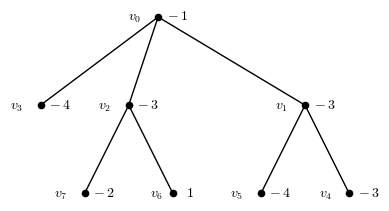

In [ ]:
# This one has three high valency vertices
P6 = Plumbing({0: -1, 1: -3, 2: -3, 3: -4, 4: -3, 5: -4, 6: 1, 7: -2}, [(0,1),(0,2),(0,3),(1,4),(1,5),(2,6),(2,7)]);P6.display()

In [ ]:
st = time.time()
zh = P6.zhat(["A",1],P6.spin_c(["A",1])[0],50,n_powers_start = 15, method = "cython") 
end = time.time()
print(end-st)
print(zh)

78.53721833229065
-4*q^(12044499384671/198922245628) + 4*q^(11646654893415/198922245628) + 4*q^(10850965910903/198922245628) + 4*q^(9856354682763/198922245628) - 4*q^(9657432437135/198922245628) + 4*q^(8264976717739/198922245628) - 4*q^(7071443243971/198922245628) + 4*q^(6872520998343/198922245628) - 4*q^(6186131847747/196081488796) + 4*q^(5990050358951/196081488796) - 4*q^(5401805892563/196081488796) - 4*q^(4813561426175/196081488796) - 4*q^(4617479937379/196081488796) - 4*q^(4225316959787/196081488796) + 4*q^(4029235470991/196081488796) - 4*q^(3070754344811/197491651980) - 4*q^(1885804432931/197491651980) + 4*q^(1688312780951/197491651980) + 4*q^(1107788181611/199645342620) - 4*q^(707212112123/199283138124)


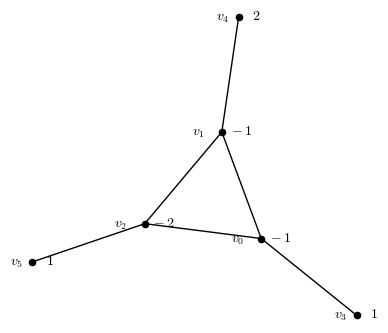

In [32]:
# This one has three high valency vertices
P7 = Plumbing({0: -1, 1: -1, 2: -2, 3: 1, 4: 2, 5: 1}, [(0,1),(0,2),(0,3),(1,4),(2,5),(1,2)]);P7.display()

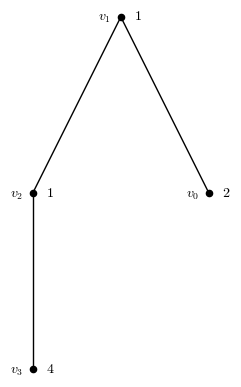

In [ ]:
P8 = Plumbing({0: 2, 1: 1, 2: 1, 3: 4}, [(0,1),(1,2),(1,2),(2,3)],[(1,2),(1,2)]);P8.display()

In [ ]:
P8._plumbing_matrix = 

In [36]:
P8.plumbing_matrix

[2 1 0 0]
[1 1 1 0]
[0 1 1 1]
[0 0 1 4]

In [52]:
st = time.time()
zh = P7.zhat(["A",1],P7.spin_c(["A",1])[0],50,n_powers_start = 12, method = "cython") 
end = time.time()
print(end-st)
print(zh)

24.599451065063477
-16 + 16q^(5) - 16q^(15) + 16q^(30) - 16q^(50) + O(q^51)


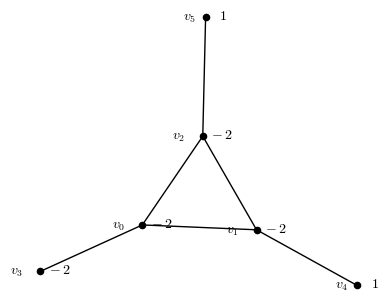

In [53]:
P8 = Plumbing({0: -2, 1: -2, 2: -2, 3: -2, 4: 1, 5: 1}, [(0,1),(0,2),(0,3),(1,4),(2,5),(1,2)]);P8.display()

In [54]:
st = time.time()
zh = P8.zhat(["A",1],P8.spin_c(["A",1])[0],50,n_powers_start = 12, method = "cython") 
end = time.time()
print(end-st)
print(zh)

6.816486597061157
q^(-1/4)(-8 + 8q^(1) - 8q^(3) + 8q^(6) - 8q^(10) + 8q^(15) - 8q^(21) + 8q^(28) - 8q^(36) + 8q^(45) + O(q^55))


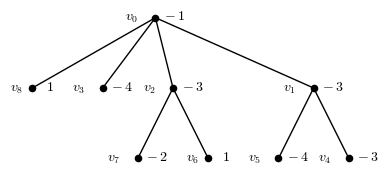

In [54]:
# This one has three high valency vertices
P9 = Plumbing({0: -1, 1: -3, 2: -3, 3: -4, 4: -3, 5: -4, 6: 1, 7: -2,8:1}, [(0,1),(0,2),(0,3),(0,8),(1,4),(1,5),(2,6),(2,7)]);P9.display()

In [66]:
st = time.time()
zh = P9.zhat(["A",1],P9.trivial_spin_c(["A",1]),50,n_powers_start = 5, method = "cython",info = True) 
end = time.time()
print(end-st)
print(zh)

Computing 5
Maximum power computed 132122187995/9834654772
zhat_A: 4*q^(497152659359/9481430884) - 4*q^(373894057867/9481430884) + 4*q^(364412626983/9481430884) - 2*q^(354931196099/9481430884) - 2*q^(312006457343/9619630532) + 2*q^(263908304683/9619630532) + 2*q^(215810152023/9619630532) - 2*q^(196570890959/9619630532) + 2*q^(141956842767/9834654772)
zhat_B: -4*q^(951146769907/9761924580) + 2*q^(873051373267/9761924580) - 2*q^(677812881667/9761924580) - 4*q^(497152659359/9481430884) - 2*q^(411819781403/9481430884) + 2*q^(383375488751/9481430884) + 2*q^(354931196099/9481430884) - 2*q^(335968334331/9481430884) + 2*q^(317005472563/9481430884) + 2*q^(312006457343/9619630532) - 2*q^(292767196279/9619630532) + 2*q^(273527935215/9619630532) - 2*q^(263908304683/9619630532) + 2*q^(244669043619/9619630532) - 2*q^(225429782555/9619630532) - 2*q^(215810152023/9619630532) - 2*q^(196570890959/9619630532) - 2*q^(167711999363/9619630532) + 2*q^(161626152311/9834654772) - 4*q^(141956842767/9834654772)


With Plumbing.zhat_vec we can also compute zhat at higher rank.

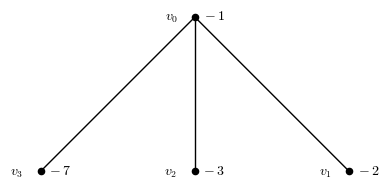

In [8]:
P.display()

In [9]:
for method in ["python","vectorized","cython"]:
    print(method)
    st = time.time()
    zh = P.zhat(["A",2],P.spin_c(["A",2])[0],100,n_powers_start = 1, method = method) 
    end = time.time()
    print(end-st)
    print(zh)

python
5.92275071144104
q^(2)(-12 + 24q^(1) - 24q^(3) - 12q^(4) + 24q^(5) + 24q^(8) - 48q^(9) - 24q^(10) + 48q^(11) - 24q^(13) + O(q^14))
vectorized
1.4732842445373535
q^(2)(-12 + 24q^(1) - 24q^(3) - 12q^(4) + 24q^(5) + 24q^(8) - 48q^(9) - 24q^(10) + 48q^(11) - 24q^(13) + O(q^14))
cython
1.4831657409667969
q^(2)(-12 + 24q^(1) - 24q^(3) - 12q^(4) + 24q^(5) + 24q^(8) - 48q^(9) - 24q^(10) + 48q^(11) - 24q^(13) + O(q^14))


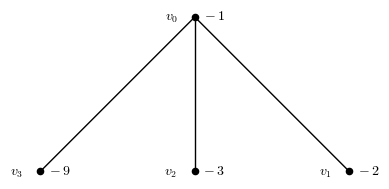

In [10]:
P4.display()

In [11]:
for method in ["python","vectorized","cython"]:
    print(method)
    st = time.time()
    zh = P4.zhat(["A",2],P4.spin_c(["A",2])[0],100,n_powers_start = 3, method = method) 
    end = time.time()
    print(end-st)
    print(zh)

python
4.567965507507324
q^(4)(-12 - 24q^(4) + 48q^(5) - 24q^(12) - 24q^(15) - 12q^(16) + 48q^(17) - 24q^(19) - 12q^(20) + 48q^(29) + O(q^31))
vectorized
1.0178442001342773
q^(4)(-12 - 24q^(4) + 48q^(5) - 24q^(12) - 24q^(15) - 12q^(16) + 48q^(17) - 24q^(19) - 12q^(20) + 48q^(29) + O(q^31))
cython
0.9654583930969238
q^(4)(-12 - 24q^(4) + 48q^(5) - 24q^(12) - 24q^(15) - 12q^(16) + 48q^(17) - 24q^(19) - 12q^(20) + 48q^(29) + O(q^31))


In [16]:
method = "cython"
for spinc in P4.spin_c(["A",2]):
    print(spinc.T)
    st = time.time()
    zh = P4.zhat(["A",2],spinc,100,n_powers_start = 4, method = "cython") 
    end = time.time()
    print(end-st)
    print(zh)

[ 1 -1 -1 -1]
[ 1 -1 -1 -1]
1.652625322341919
q^(4)(-12 - 24q^(4) + 48q^(5) - 24q^(12) - 24q^(15) - 12q^(16) + 48q^(17) - 24q^(19) - 12q^(20) + 48q^(29) + O(q^31))
[ 3 -1 -5 -7]
[ 0 -1  1  2]
1.5264601707458496
q^(86667/20000)(4 + 2q^(1) + 4q^(2) + 4q^(3) - 8q^(4) + 4q^(5) - 4q^(7) - 8q^(8) + 6q^(9) + 4q^(12) + O(q^13))


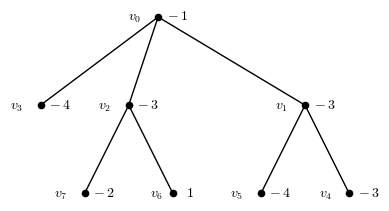

In [55]:
P6.display()

In [ ]:
'